### Importing Libraries

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
def cal_null(df_cal=None):
    if df_cal is None:
        return 'No DataFrame passed'
    else:
        try:
            null_df = pd.DataFrame(round(100*df_cal.isnull().sum()/df_cal.shape[0],2)).reset_index()
            null_df.columns=['Columns','Null %']
            return null_df.sort_values(by='Null %',ascending=False)
        except Exception as e:
            print(e)

In [5]:
cal_null(data)

,Columns,Null %
72,PoolQC,99.52
74,MiscFeature,96.30
6,Alley,93.77
73,Fence,80.75
57,FireplaceQu,47.26
...,...,...
27,ExterQual,0.00
24,Exterior2nd,0.00
23,Exterior1st,0.00
22,RoofMatl,0.00


In [6]:
# Dropping with more than 50% NULL
data.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [7]:
cal_null(data)

,Columns,Null %
56,FireplaceQu,47.26
3,LotFrontage,17.74
57,GarageType,5.55
58,GarageYrBlt,5.55
59,GarageFinish,5.55
...,...,...
36,BsmtUnfSF,0.00
37,TotalBsmtSF,0.00
1,MSSubClass,0.00
39,HeatingQC,0.00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Handling Null values

In [9]:
num_cols=data.describe().columns

In [10]:
cat_cols=['MSZoning','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
         'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
         'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
         'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','Street','RoofStyle']

In [11]:
#check whether if any column is missing
kitty=[]
for x in data.columns:
    if x not in num_cols:
        kitty.append(x)
for y in kitty:
    if y not in cat_cols:
        print(y)

In [12]:
def handle_numerical(na_df=None,na_col=None):
    na_df[na_col]=na_df[na_col].fillna(na_df[na_col].mean())
def handle_categorical(na_df=None,na_col=None):
    na_df[na_col]=na_df[na_col].fillna(na_df[na_col].mode()[0])

In [13]:
for i in num_cols:
    handle_numerical(data,i)
for j in cat_cols:
    handle_categorical(data,j)

In [14]:
cal_null(data)

,Columns,Null %
0,Id,0.0
49,HalfBath,0.0
56,FireplaceQu,0.0
55,Fireplaces,0.0
54,Functional,0.0
...,...,...
25,MasVnrArea,0.0
24,MasVnrType,0.0
23,Exterior2nd,0.0
22,Exterior1st,0.0


In [15]:
data.shape

(1460, 77)

## EDA

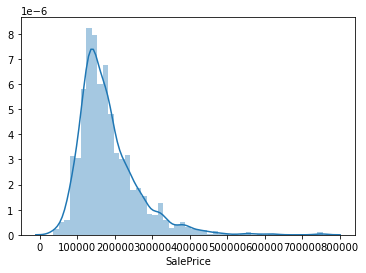

In [16]:
#Check the response variables
sns.distplot(data['SalePrice'])
plt.show()

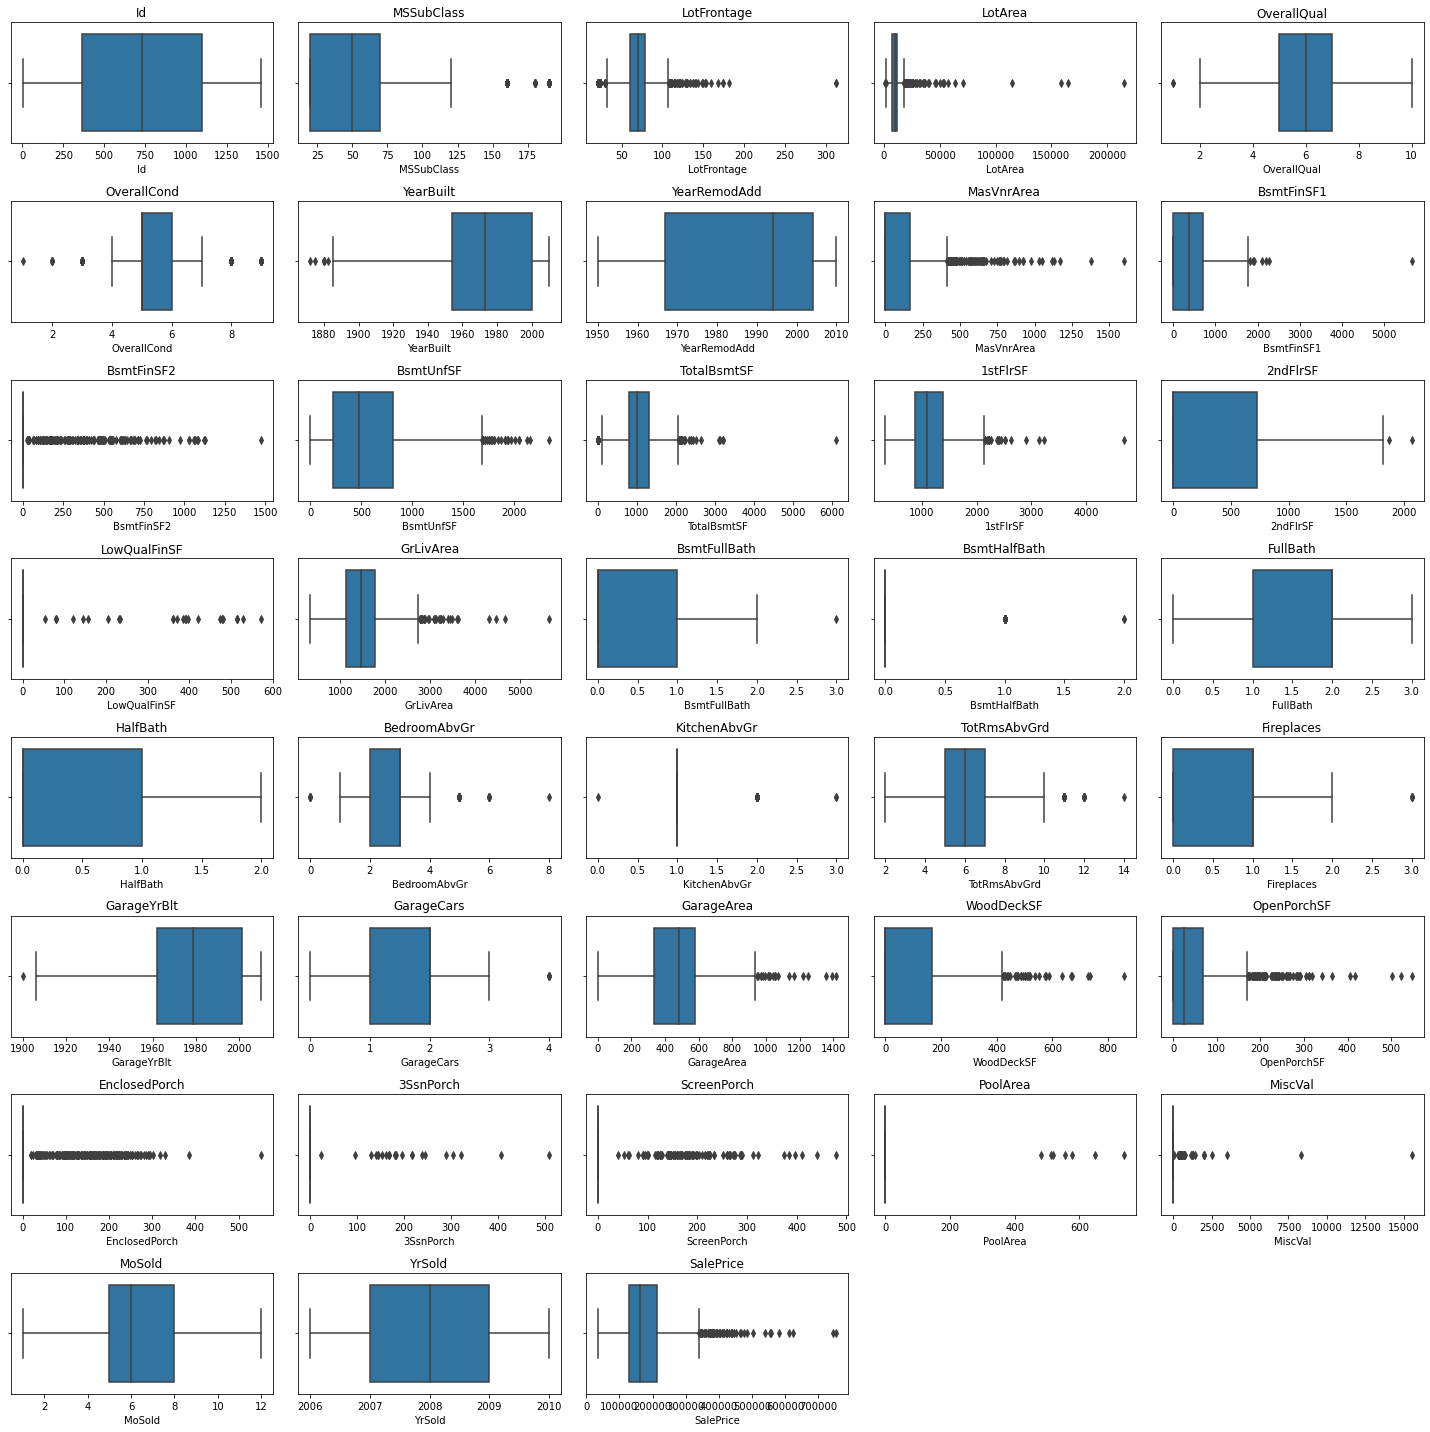

In [17]:
def num_visuals(col_name,loc):
    plt.subplot(8,5,loc)
    sns.boxplot(data[col_name])
    plt.title(col_name,fontdict={'fontsize': 12})

position=1
plt.figure(figsize=[20,20])
for item in num_cols:
    num_visuals(item,position)
    position+=1
plt.tight_layout()
plt.show()

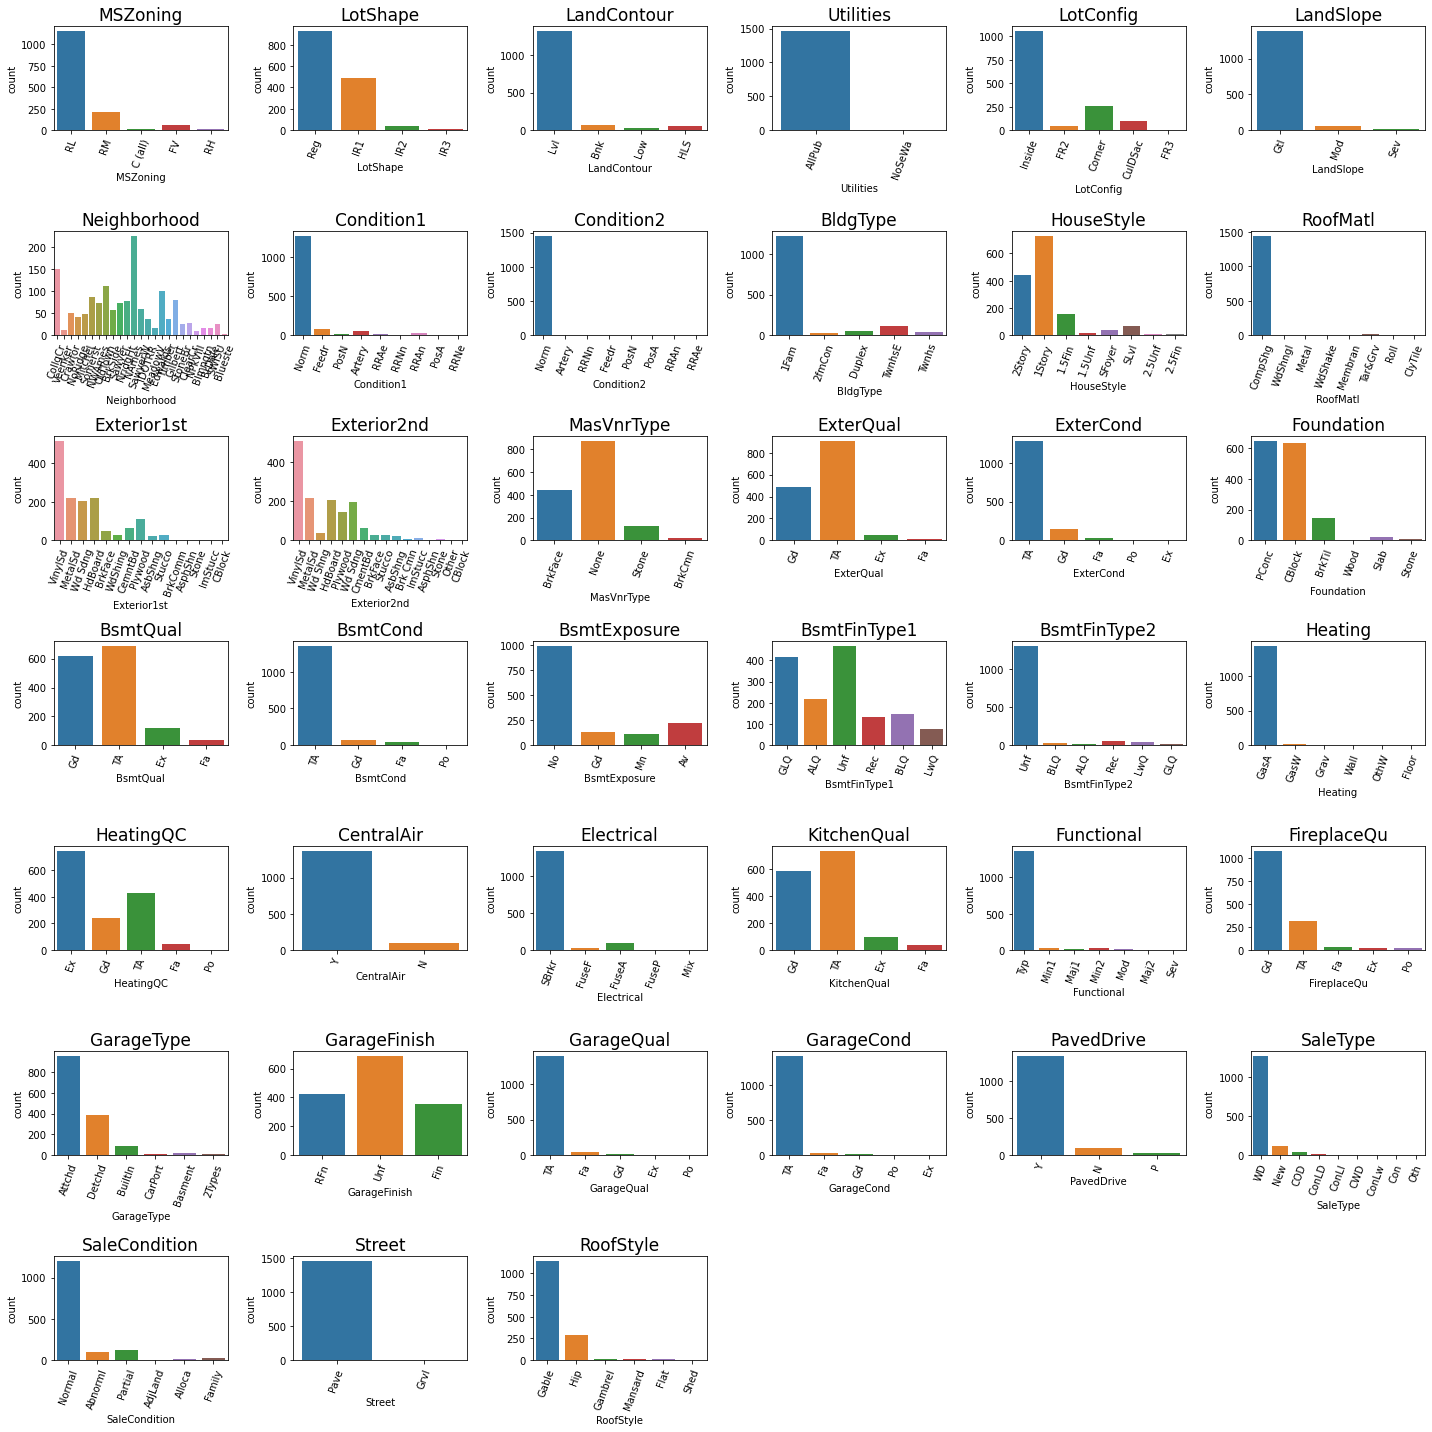

In [18]:
def cat_visuals(col_name,loc):
    plt.subplot(7,6,loc)
    sns.countplot(data[col_name])
    plt.title(col_name,fontdict={'fontsize': 17})
    plt.xticks(rotation=70)
    
position=1
plt.figure(figsize=[20,20])
for item in cat_cols:
    cat_visuals(item,position)
    position+=1
plt.tight_layout()
plt.show()

### Target variable w.r.t. other variables

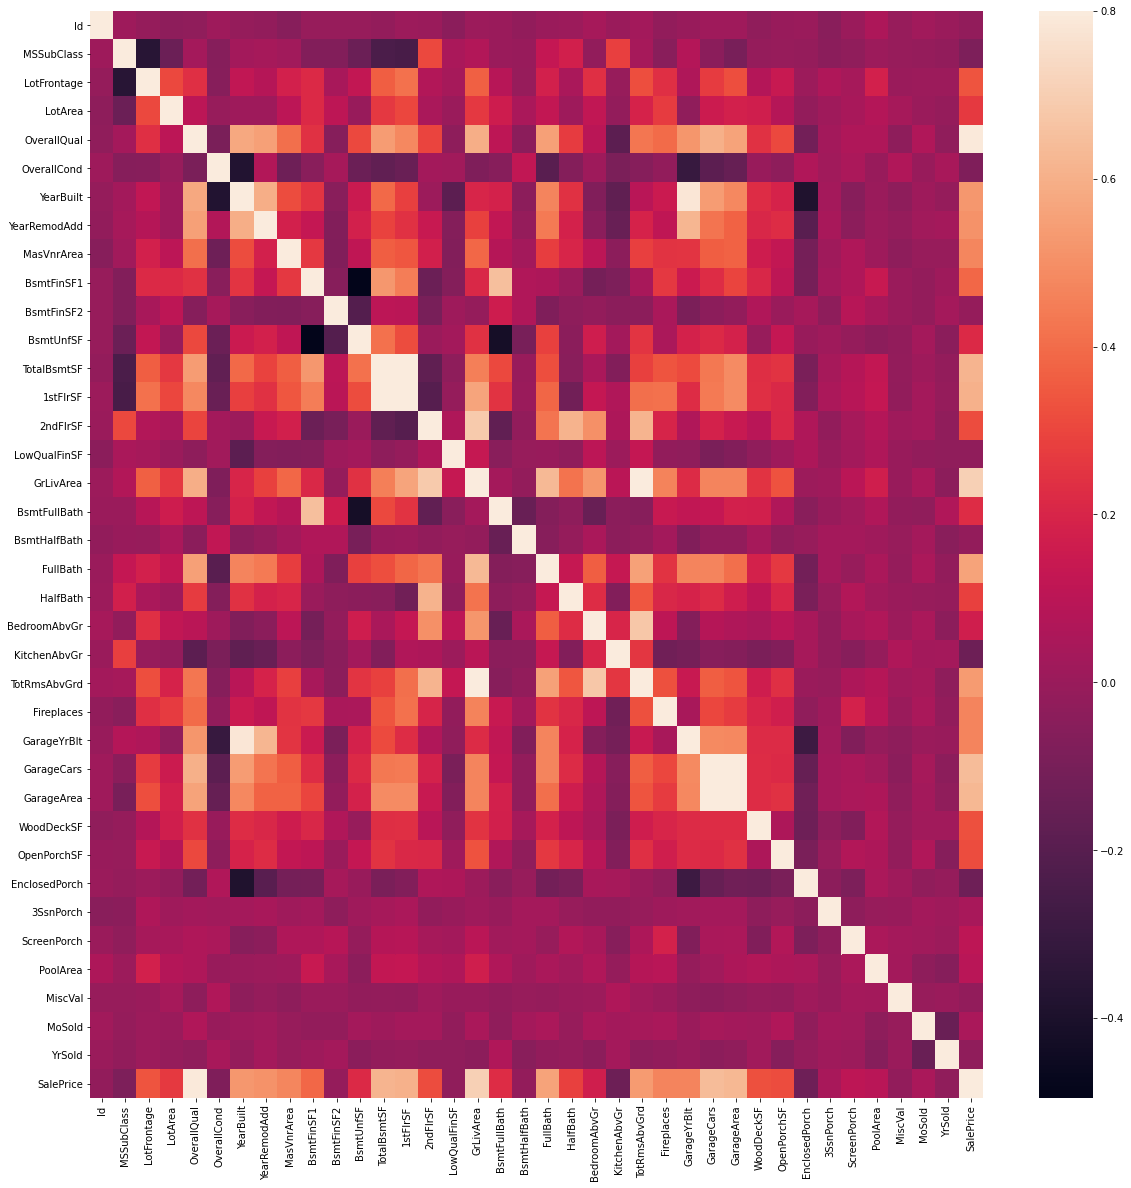

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), vmax=0.8)
plt.show()

## Model Building

### Encoding Categorical variables

In [20]:
dummy_df = pd.get_dummies(data,columns=cat_cols)
df = pd.merge(data,dummy_df,how='left')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition_Normal,SaleCondition_Partial,Street_Grvl,Street_Pave,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,1,0,1,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,1,0,0,1,0,1,0,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,1,0,0,1,0,1,0,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,1,0,1,0,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,1,0,1,0,0,0,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,1,0,1,0,0,0,0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,1,0,1,0,0,0,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,1,0,0,0,1,0,0


In [21]:
df= df.drop(labels=cat_cols,axis=1)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleCondition_Normal,SaleCondition_Partial,Street_Grvl,Street_Pave,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,0,0,1,0,1,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,0,0,1,0,1,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,0,0,1,0,1,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,0,1,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,1,0,0,1,0,1,0,0,0,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,1,0,0,1,0,1,0,0,0,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,1,0,0,1,0,1,0,0,0,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,1,0,0,1,0,0,0,1,0,0


In [22]:
X=df.iloc[:, :-1]
y=df.iloc[:, -1]


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)
print(X_train.shape,X_test.shape)

(978, 276) (482, 276)


### Lasso Regression

In [24]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
# Calculating best value of Alpha
lassocv = LassoCV(alphas=np.arange(0, 10, 0.01), cv=10)
_ = lassocv.fit(X_train,y_train)
print('Best alpha:', lassocv.alpha_)

Best alpha: 9.99


In [28]:
lasso = Lasso(alpha=9.99)
lasso.fit(X_train,y_train)

Lasso(alpha=9.99)

In [29]:
predictions = lasso.predict(X_test)

In [30]:
print("Lasso's Accuracy", (np.sqrt(mean_squared_error(y_test, predictions))))

Lasso's Accuracy 0.0022900557523854058


In [31]:
print("Training score:", lasso.score(X_train, y_train))
print("Testing score:", lasso.score(X_test, y_test))
print("MAE of Lasso Regression:", mean_absolute_error(y_test, predictions), '\n')

Training score: 0.0015668832009501088
Testing score: 0.0
MAE of Lasso Regression: 0.0019951301782548015 



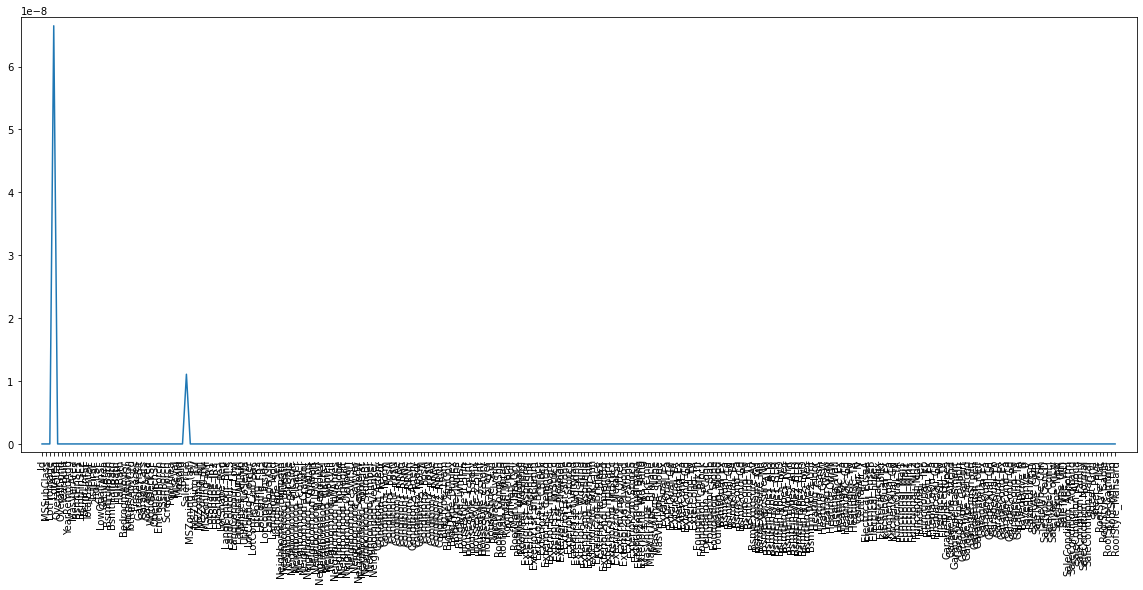

In [32]:
# Plot the coefficients
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(range(len(X.columns)), lasso.coef_)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90) 
plt.margins(0.02)
plt.show()

In [33]:
print("Number of features before Lasso:", len(lasso.coef_))
print("Number of features after fitting Lasso:", len(lasso.coef_[lasso.coef_ > 0]))

Number of features before Lasso: 276
Number of features after fitting Lasso: 2


## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


RMSE : [0.005806901688688089, 0.01300546901398992, 0.023477542138243688, 0.0333224996851043, 0.043344944721646184, 0.04822656799822896, 0.050160836837836356, 0.050752352336959176]


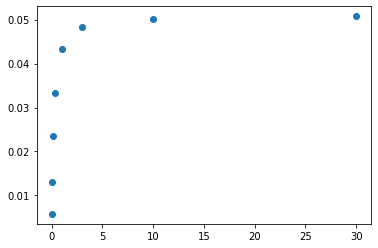

In [36]:
rmse=[]
# check the below alpha values for Ridge Regression
alpha=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(predict, y_test)))
print("RMSE :",rmse)
plt.scatter(alpha, rmse)
plt.show()

In [37]:
# Create ridge regression with three possible alpha values
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

# Fit the linear regression
model_cv = regr_cv.fit(X_std, y)

# View alpha
model_cv.alpha_

0.1

In [38]:
# np.log1p(data['SalePrice'])
# Use alpha=11 to predict the test data
ridge=Ridge(alpha=0.1)
# Use all training data to fit the model
ridge.fit(X_train, y_train)
predicted_price=ridge.predict(X_test)
# Transform back the log(SalePrice+1) to SalePrice
Test_price=np.exp(list(predicted_price))-1
Test_price

array([-2.40520697e-03,  5.25927172e-03,  2.51896323e-03, -5.33554311e-03,
       -8.36617063e-03, -7.21653940e-04, -3.54387119e-03,  1.17824009e-03,
       -1.17436467e-03, -1.95003690e-03,  3.70812820e-04,  2.12129591e-03,
        1.64301742e-02, -9.76587361e-05, -1.09959187e-03,  2.20549040e-03,
        1.87988964e-03,  4.04142749e-03,  7.69668574e-04, -1.13057292e-03,
       -7.66512371e-03,  1.11706428e-03,  1.56276865e-03,  6.07392390e-03,
        3.28478268e-03, -2.88185932e-03, -1.01418438e-03, -8.03378247e-03,
       -7.49067539e-04,  3.03037030e-04,  2.27805445e-03,  1.94677151e-03,
        5.55078814e-03, -3.15127938e-04,  3.42899699e-04, -1.28362519e-03,
        5.84043085e-03,  3.64712952e-03, -1.29429885e-03,  3.00043471e-04,
        2.38507963e-03,  6.57785590e-03,  1.41761665e-03, -2.52945210e-04,
        4.33064174e-03,  3.97632275e-04,  2.59503678e-03,  9.28353928e-04,
       -2.02998445e-04,  2.55480274e-03,  3.74006155e-03,  3.83299850e-03,
        4.33983710e-03,  

In [39]:
result=pd.DataFrame()
result['Id']=X_test.Id
result['SalePrice']=Test_price
result

,Id,SalePrice
892,893,-0.002405
1105,1106,0.005259
413,414,0.002519
522,523,-0.005336
1036,1037,-0.008366
...,...,...
1010,1011,-0.002914
390,391,-0.004762
1409,1410,-0.005360
847,848,-0.005667


The obtained dataframe is the predicted prices